<a href="https://colab.research.google.com/github/Gisselo/Telecom-X-/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [11]:

import pandas as pd
import requests
import json
import numpy as np

# Hacer la petición a la API
response = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

# Crear DataFrame desde el JSON
df = pd.DataFrame(response.json())
df




,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [12]:
id_churn = df[['customerID', 'Churn']]
id_churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [14]:
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

#ccrear el df base

telecom_df = pd.concat([id_churn, customer, phone, internet, account], axis=1)
telecom_df.sample(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1728,2455-USLMV,No,Female,0,No,No,31,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.75,2613.4
3942,5383-MMTWC,Yes,Female,1,Yes,No,8,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.00,613.4
3749,5154-VEKBL,Yes,Female,0,No,No,9,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,58.50,539.85
6660,9152-AMKAK,No,Male,0,No,No,6,Yes,No,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,80.25,493.4


In [15]:
# Tipos de datos

telecom_df.rename(columns={
    'customerID': 'id_cliente',
    'gender': 'genero',
    'SeniorCitizen': 'es_ciudadano_senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_en_empresa',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
    'Churn': 'abandono'
}, inplace=True)

telecom_df.head()



,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [16]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [17]:
#datos null
telecom_df.isnull().sum()

,0
id_cliente,0
abandono,0
genero,0
es_ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
tipo_internet,0


In [18]:
#valores duplicados
print(telecom_df.duplicated().sum())

0


In [19]:
#errores de formato
for col in ['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales']:
    print(f"Valores únicos para la columna '{col}':")
    print(telecom_df[col].unique())
    print("-" * 20)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'abandono':
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
--------------------
Valores únicos para la columna 'es_ciudadano_senior':
[0 1]
--------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
--------------------
Valores únicos para la columna 'tiene_dependientes':
['Yes' 'No']
--------------------
Valores únicos para la columna 'meses_en_empresa':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'servicio_telefonico':
['Yes' 'No']
--------------------
Valores únicos para la columna 'lineas_multiples':
['No'

Limpieza

In [20]:
#limpieza columna id del cliente
telecom_df['id_cliente'] = telecom_df['id_cliente'].str.strip()
telecom_df['id_cliente'].sample(4)

,id_cliente
4620,6338-AVWCY
3145,4385-GZQXV
5089,6959-UWKHF
5627,7683-CBDKJ


In [25]:
#limpieza de la columna tipo_contrato
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.lower()
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()

#
telecom_df['tipo_contrato'].sample(4)


,tipo_contrato
6342,two year
3789,two year
1146,one year
4937,one year


In [26]:
#limpieza de la columna metodo_pago
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.lower()
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.replace(r'', '', regex=True).str.strip()


##
telecom_df['metodo_pago'].sample(4)


,metodo_pago
5607,credit card (automatic)
2634,credit card (automatic)
3835,electronic check
201,mailed check


Limpieza de los datos númericos

In [27]:
#Eliminando los espacios del la columna cargos totales
telecom_df['cargos_totales'] = telecom_df['cargos_totales'].replace(' ', np.nan)
#convirtiendo el tipo de dato
telecom_df['cargos_totales'] = pd.to_numeric(telecom_df['cargos_totales'], errors='coerce')
telecom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [28]:
# Eliminar registros con cargos_totales faltantes
telecom_df = telecom_df.dropna(subset=['cargos_totales'])

# Verificación rápida
print(f"Número de registros después de limpieza: {len(telecom_df)}")

Número de registros después de limpieza: 7256


In [29]:
col_binario = ['abandono','tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
telecom_df[col_binario].sample(4)


,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
4733,Yes,Yes,No,Yes,Yes
6235,Yes,No,No,Yes,Yes
1353,No,Yes,Yes,Yes,Yes
3819,No,Yes,No,No,No


In [30]:
## Transformar columnas binarias en 'Yes' en 1 y 'No' en 0: la finalidad poder analizar estas columna

telecom_df.loc[:, col_binario] = telecom_df[col_binario].astype(str)
telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].fillna(0)
telecom_df[col_binario].sample(4)


/tmp/ipython-input-2214885106.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
/tmp/ipython-input-2214885106.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df.loc[:, col_binario] = telecom_df.loc[:, col_binario].fillna(0)


,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
2968,0.0,0,0,1,1
2652,0.0,0,0,1,1
6802,1.0,1,0,0,1
5151,1.0,0,0,1,1


In [31]:
telecom_df[col_binario] = telecom_df[col_binario].astype(np.int64)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   es_ciudadano_senior     7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_dependientes      7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int64  
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_streaming            7256 non-null   objec

#📊 Carga y análisis

In [32]:
#creando la columna cuentas_diarias
telecom_df['cuentas_diarias'] = telecom_df['cargos_mensuales']/30
telecom_df[['cargos_mensuales', 'cuentas_diarias']].sample(4)


,cargos_mensuales,cuentas_diarias
1871,95.35,3.178333
4991,21.05,0.701667
152,19.70,0.656667
2128,104.90,3.496667


In [33]:
#análisis descriptivo
telecom_df.describe()

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


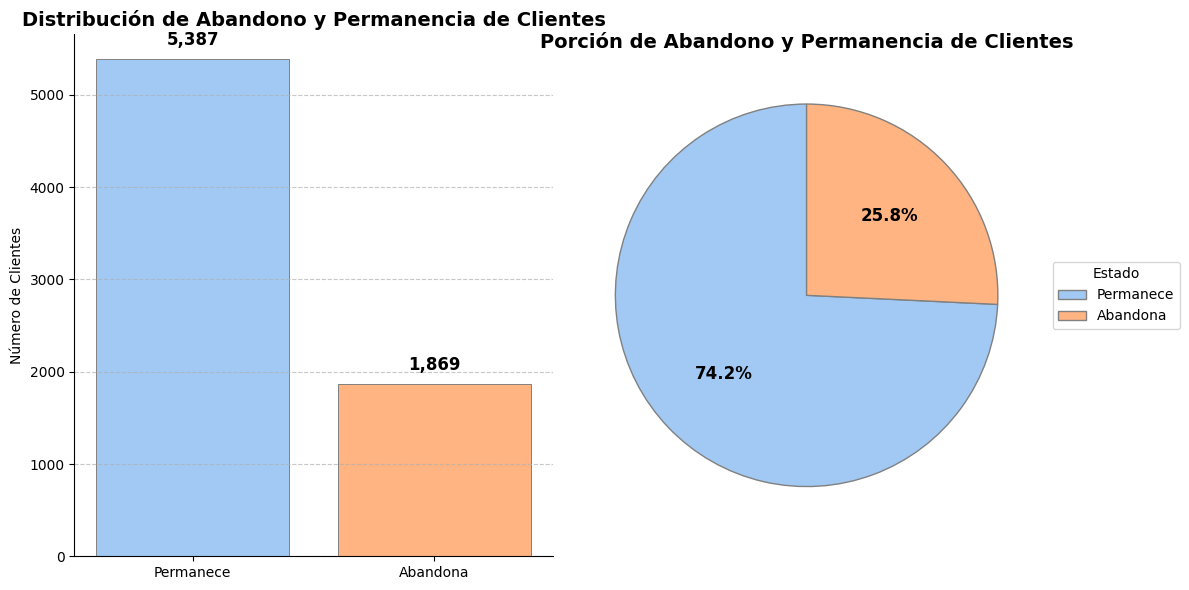

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
abandono_counts = telecom_df["abandono"].value_counts().sort_index()
labels_map = {0: "Permanece", 1: "Abandona"}
labels = [labels_map[i] for i in abandono_counts.index]

# Colores usando una paleta de Seaborn
colors = sns.color_palette("pastel")[0:2]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras
bars = axs[0].bar(labels, abandono_counts.values, color=colors, edgecolor='gray', linewidth=0.7)

# Añadir etiquetas arriba de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + abandono_counts.max() * 0.02,  # un poco por encima
        f'{height:,}',  # con separador de miles
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

axs[0].set_title('Distribución de Abandono y Permanencia de Clientes', fontsize=14, weight='bold')
axs[0].set_ylabel('Número de Clientes')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de pastel
wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'gray'}
)

# Añadir leyenda con etiquetas
axs[1].legend(wedges, labels, title="Estado", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

axs[1].set_title('Porción de Abandono y Permanencia de Clientes', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


In [35]:
# Función auxiliar para ver distribución de abandono por cada categoría
def analizar_evasion_por_categoria(df, columna):
    cruzado = pd.crosstab(df[columna], df['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Variables categóricas a analizar
categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'tipo_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = analizar_evasion_por_categoria(telecom_df, cat)


Análisis para: genero
        % No Abandono  % Abandono
genero                           
Female      73.822135   26.177865
Male        74.652494   25.347506

Análisis para: tipo_contrato
                % No Abandono  % Abandono
tipo_contrato                            
month to month      58.676654   41.323346
one year            89.064559   10.935441
two year            97.230237    2.769763

Análisis para: metodo_pago
                           % No Abandono  % Abandono
metodo_pago                                         
bank transfer (automatic)      83.742911   16.257089
credit card (automatic)        85.194639   14.805361
electronic check               56.196319   43.803681
mailed check                   81.412191   18.587809

Análisis para: tipo_internet
               % No Abandono  % Abandono
tipo_internet                           
DSL                81.514297   18.485703
Fiber optic        59.443402   40.556598
No                 92.825397    7.174603


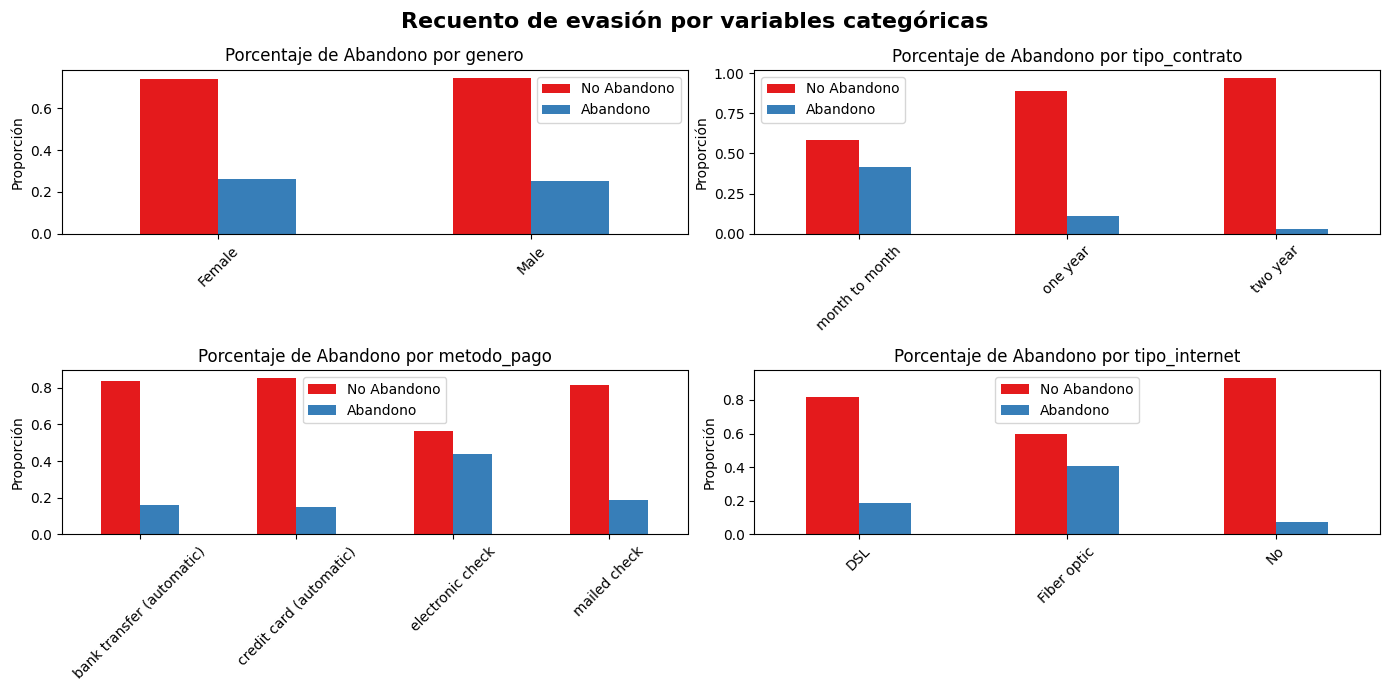

In [38]:
# Configuración de subplots: 2 columnas por fila
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(14, 7))
axes = axes.flatten()
colors = sns.color_palette("Set1", n_colors=2)


# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    cruzado = pd.crosstab(telecom_df[cat], telecom_df['abandono'], normalize='index')
    cruzado.plot(kind='bar', ax=axes[i], color=colors)

    axes[i].set_title(f'Porcentaje de Abandono por {cat}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción')
    axes[i].legend(['No Abandono', 'Abandono'])
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Recuento de evasión por variables categóricas', fontsize=16, weight='bold', ha='center')

plt.tight_layout()
plt.show()

In [39]:
binarias = ['es_ciudadano_senior', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
def analizar_evasion_binarias(df, columna):
    # Mapeo opcional para mejor legibilidad (0 = No, 1 = Sí)
    df_temp = df.copy()
    df_temp[columna] = df_temp[columna].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[columna], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']

    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Resultados por columna binaria
resultados_binarios = {}
for col in binarias:
    resultados_binarios[col] = analizar_evasion_binarias(telecom_df, col)


Análisis para: es_ciudadano_senior
                     % No Abandono  % Abandono
es_ciudadano_senior                           
No                       77.066184   22.933816
Sí                       59.729272   40.270728

Análisis para: tiene_pareja
              % No Abandono  % Abandono
tiene_pareja                           
No                67.974380   32.025620
Sí                80.934739   19.065261

Análisis para: tiene_dependientes
                    % No Abandono  % Abandono
tiene_dependientes                           
No                      69.661817   30.338183
Sí                      84.976959   15.023041

Análisis para: servicio_telefonico
                     % No Abandono  % Abandono
servicio_telefonico                           
No                       75.886525   24.113475
Sí                       74.065028   25.934972

Análisis para: factura_electronica
                     % No Abandono  % Abandono
factura_electronica                           
No            

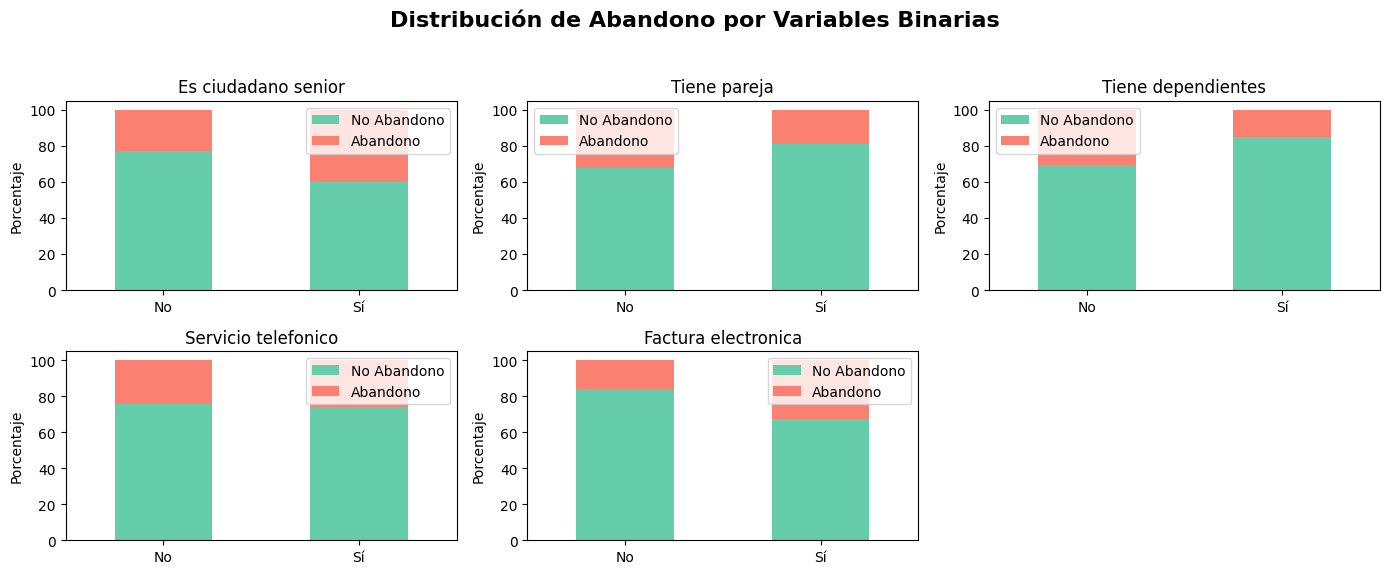

In [40]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for idx, col in enumerate(binarias):
    df_temp = telecom_df.copy()
    df_temp[col] = df_temp[col].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[col], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['No Abandono', 'Abandono']

    cruzado.plot(kind='bar', stacked=True, color=['mediumaquamarine', 'salmon'], ax=axes[idx])
    axes[idx].set_title(f'{col.replace("_", " ").capitalize()}')
    axes[idx].set_ylabel('Porcentaje')
    axes[idx].set_xlabel('')
    axes[idx].legend(loc='best')
    axes[idx].tick_params(axis='x', rotation=0)

# Eliminar subplot vacío
if len(binarias) < len(axes):
    for j in range(len(binarias), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Distribución de Abandono por Variables Binarias', fontsize=16, weight='bold', ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#📄Informe final

Los clientes con contratos mensuales presentan una mayor tendencia a cancelar, lo que refleja un compromiso menor en comparación con contratos de mayor duración. Además, aquellos que combinan contratos mensuales con pagos electrónicos tienen más probabilidades de abandonar el servicio. Factores personales como la edad y vivir sin familiares a cargo también influyen en la decisión de cancelar. Los usuarios nuevos o con bajo uso del servicio son especialmente vulnerables a la evasión, por lo que es crucial enfocar esfuerzos en mejorar su experiencia inicial. La factura electrónica parece estar vinculada a clientes más exigentes y menos leales, mientras que el uso de pagos automáticos contribuye a disminuir la tasa de cancelación, probablemente por la facilidad que ofrece. La lealtad de los clientes tiende a aumentar con el tiempo, lo que hace fundamental implementar estrategias de retención en los primeros meses. Por último, un mayor gasto no garantiza que un cliente permanezca, por lo que la satisfacción y la percepción del valor ofrecido son factores clave para mantenerlos.